<a href="https://colab.research.google.com/github/d-vf/notebooks/blob/master/QREN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###QREN

Dataset: 

Period: 2007-2014

https://dados.gov.pt/en/datasets/concelhos-de-portugal/

http://www.dgeec.mec.pt/np4/206/


Table 1 Network statistics by type of organisation (Horizon 2020)
## Notes

http://econ.geo.uu.nl/boschma/boschma.html#workingpapers

"Network dynamics in collaborative research in the EU, 2003-2017 " http://econ.geo.uu.nl/peeg/peeg1911.pdf

### Networks

https://pysal.readthedocs.io/en/latest/

https://python-graph-gallery.com/321-custom-networkx-graph-appearance/

https://networkx.github.io/documentation/stable/auto_examples/index.html

https://networkx.github.io/documentation/networkx-1.10/reference/generated/networkx.algorithms.operators.binary.union.html#networkx.algorithms.operators.binary.union

https://github.com/tomalrussell/snkit/blob/master/notebooks/snkit-demo.ipynb


## To do

* Multi graph

* Distance from: UNIV Lisboa, Porto, Coimbra, Braga 

https://www.webometrics.info/en/Europe/Portugal

http://www.shanghairanking.com/World-University-Rankings-2018/Portugal.html

https://www.ulisboa.pt/en/info/rankings

## Data

https://dados.gov.pt/en/datasets/r/59368d37-cbdb-426a-9472-5a04cf30fbe4

Shapefiles : https://dados.gov.pt/en/datasets/concelhos-de-portugal/

##Libraries

In [128]:
! pip install geopandas
! pip install networkx
! pip install gspread-pandas

In [0]:
#Base
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

#Google drive
import google.colab

# Load the Drive helper and mount
from google.colab import drive

#get access to gs
import gspread_pandas
from gspread_pandas import Spread, Client

#geopandas
import geopandas as gpd 

#network analysis
import networkx as nx


## QREN

In [0]:
url_qren="https://raw.githubusercontent.com/d-vf/qren-2007-2014/gh-pages/data/qren-2007-2014.csv"
qren=pd.read_csv(url_qren, encoding="ISO-8859-1")

In [0]:
qren

In [0]:
qren.shape

In [132]:
qren.dtypes

N Proj                                 int64
Promotor                              object
Designacao                            object
Instrumento                           object
Aviso                                 object
Aut Gestao                            object
Org Intermedio                        object
Concelho                              object
Regiao                                object
Sector                                object
CAE (Rev3)                            object
Estrategia de Eficiencia Colectiva    object
Data de Aprovacao                     object
Investimento Elegivel                  int64
Incentivo                              int64
N Contribuinte do Promotor             int64
dtype: object

In [0]:
qren["Sector"] = qren["Sector"].astype('category')

In [0]:
qren["Concelho"] = qren["Concelho"].astype('category')

In [0]:
qren["Regiao"] = qren["Regiao"].astype('category')

In [0]:
qren["CAE (Rev3)"] = qren["CAE (Rev3)"].astype('category')

In [0]:
qren["NIF"] = qren['N Contribuinte do Promotor']

In [138]:
qren.dtypes #confirm

N Proj                                   int64
Promotor                                object
Designacao                              object
Instrumento                             object
Aviso                                   object
Aut Gestao                              object
Org Intermedio                          object
Concelho                              category
Regiao                                category
Sector                                category
CAE (Rev3)                            category
Estrategia de Eficiencia Colectiva      object
Data de Aprovacao                       object
Investimento Elegivel                    int64
Incentivo                                int64
N Contribuinte do Promotor               int64
NIF                                      int64
dtype: object

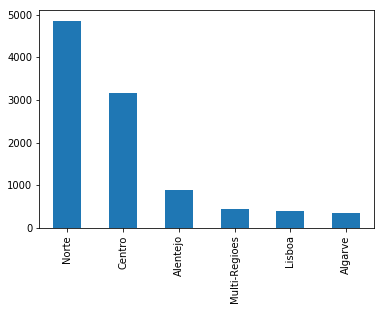

In [139]:
qren['Regiao'].value_counts().plot(kind='bar')

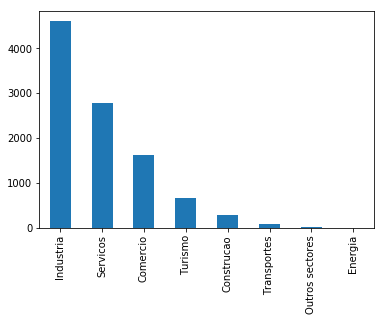

In [140]:
qren['Sector'].value_counts().plot(kind='bar')

## GEO

In [142]:
# prompt for authorization.
drive.mount('/content/drive/')
# files in "/content/drive/My Drive/concelhos-shapefile".
!ls "/content/drive/My Drive/concelhos-shapefile"
#os.chdir('/content/drive/My Drive/concelhos-shapefile') # Provide the new path here
os.getcwd() #confirm

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
 concelhos.cpg	 concelhos.qpj	 Cont_AAD_CAOP2018
 concelhos.dbf	 concelhos.shp	 Cont_AAD_CAOP2018.zip
 concelhos.prj	 concelhos.shx	'Copy of IPR Startups.gsheet'


'/content'

In [0]:
fp = "/content/drive/My Drive/concelhos-shapefile/concelhos.shp" #shapefile
map_df = gpd.read_file(fp) 

In [0]:
map_df.total_bounds

In [145]:
print (map_df.columns)

Index(['ID_0', 'ISO', 'NAME_0', 'ID_1', 'NAME_1', 'ID_2', 'NAME_2', 'HASC_2',
       'CCN_2', 'CCA_2', 'TYPE_2', 'ENGTYPE_2', 'NL_NAME_2', 'VARNAME_2',
       'geometry'],
      dtype='object')


In [0]:
map_df.head(5)

In [0]:
map_df['NAME_1'].unique()

In [146]:
map_df['NAME_2'].unique()

array(['Évora', 'Alandroal', 'Arraiolos', 'Borba', 'Estremoz',
       'Montemor-o-Novo', 'Mora', 'Mourão', 'Portel', 'Redondo',
       'Reguengos de Monsaraz', 'Vendas Novas', 'Viana do Alentejo',
       'Vila Viçosa', 'Águeda', 'Ílhavo', 'Albergaria-a-Velha', 'Anadia',
       'Arouca', 'Aveiro', 'Castelo de Paiva', 'Espinho', 'Estarreja',
       'Mealhada', 'Murtosa', 'Oliveira de Azeméis', 'Oliveira do Bairro',
       'Ovar', 'São João da Madeira', 'Santa Maria da Feira',
       'Sever do Vouga', 'Vagos', 'Vale de Cambra', 'Angra do Heroísmo',
       'Calheta', 'Corvo', 'Horta', 'Lagoa', 'Lajes das Flores',
       'Lajes do Pico', 'Madalena', 'Nordeste', 'Ponta Delgada',
       'Povoação', 'Praia da Vitória', 'Ribeira Grande',
       'São Roque do Pico', 'Santa Cruz da Graciosa',
       'Santa Cruz das Flores', 'Velas', 'Vila do Porto',
       'Vila Franca do Campo', 'Aljustrel', 'Almodôvar', 'Alvito',
       'Barrancos', 'Beja', 'Castro Verde', 'Cuba',
       'Ferreira do Alentejo',

In [0]:
qren['Concelho'].unique()

In [147]:
lista = qren['Concelho'].unique()
print(*lista, sep = ", ")  

Leiria, Pombal, Guimaraes, evora, Almeirim, Alcacer do Sal, Chamusca, Portimao, Santo Tirso, Matosinhos, Porto, Marinha Grande, Figueira da Foz, Vizela, Mortagua, Tondela, Albergaria-a-Velha, Vila Nova de Gaia, Vendas Novas, Benavente, Portel, Ferreira do Alentejo, Albufeira, Grandola, Torres Novas, Aveiro, Vila Nova de Famalicao, Braga, Alijo, Paredes, Chaves, Espinho, Multi-Concelhos, Alcobaca, Felgueiras, Torres Vedras, obidos, Oliveira de Azemeis, Ponte de Lima, Azambuja, Gaviao, Sabugal, Vale de Cambra, Gondomar, Nazare, Arcos de Valdevez, Oliveira do Hospital, Caldas da Rainha, Coimbra, Mangualde, Pacos de Ferreira, Maia, Oeiras, Sintra, Mealhada, Lisboa, Faro, Tavira, Vila Real, Ponte de Sor, Viseu, Amarante, Vila do Conde, Amares, Vila Verde, Lousada, Trofa, Valongo, Peso da Regua, Fafe, Santa Maria da Feira, Arouca, Tarouca, Baiao, Marco de Canaveses, Vinhais, Celorico de Basto, Vila Nova de Foz Coa, Barcelos, Povoa de Lanhoso, Sao Joao da Madeira, Paredes de Coura, Povoa de V

In [0]:
# replace
qren['Concelho'].replace('evora', 'Évora', inplace=True)  
qren['Concelho'].replace('Mourao','Mourão', inplace=True) 
qren['Concelho'].replace('Vila Vicosa', 'Vila Viçosa',inplace=True)
qren['Concelho'].replace('agueda','Águeda', inplace=True)
qren['Concelho'].replace('ilhavo','Ílhavo', inplace=True)
qren['Concelho'].replace('Oliveira de Azemeis','Oliveira de Azeméis',inplace=True)
qren['Concelho'].replace('Sao Joao da Madeira', 'São João da Madeira',inplace=True)
qren['Concelho'].replace('Mertola', 'Mértola',inplace=True)
qren['Concelho'].replace('Povoa de Lanhoso','Póvoa de Lanhoso',inplace=True) 
qren['Concelho'].replace('Vila Nova de Famalicao', 'Vila Nova de Famalicão',inplace=True)
qren['Concelho'].replace('Braganca','Bragança',inplace=True)
qren['Concelho'].replace('Carrazeda de Ansiaes','Carrazeda de Ansiães',inplace=True)
qren['Concelho'].replace('Freixo de Espada a Cinta','Freixo de Espada à Cinta',inplace=True)
qren['Concelho'].replace('Covilha','Covilhã',inplace=True)
qren['Concelho'].replace('Fundao','Fundão',inplace=True)
qren['Concelho'].replace('Proenca-a-Nova','Proença-a-Nova',inplace=True)
qren['Concelho'].replace('Serta','Sertã',inplace=True)
qren['Concelho'].replace('Vila Velha de Rodao','Vila Velha de Ródão',inplace=True)
qren['Concelho'].replace('Gois', 'Góis',inplace=True)
qren['Concelho'].replace('Lousa', 'Lousã',inplace=True)
qren['Concelho'].replace('Tabua', 'Tábua',inplace=True)
qren['Concelho'].replace('Loule', 'Loulé',inplace=True)
qren['Concelho'].replace('Olhao','Olhão',inplace=True)
qren['Concelho'].replace('Portimao', 'Portimão',inplace=True)
qren['Concelho'].replace('Sao Bras de Alportel', 'São Brás de Alportel',inplace=True)
qren['Concelho'].replace('Vila Real de Santo Antonio', 'Vila Real de Santo António',inplace=True)
qren['Concelho'].replace('Meda', 'Mêda',inplace=True)
qren['Concelho'].replace('Vila Nova de Foz Coa', 'Vila Nova de Foz Côa',inplace=True)
qren['Concelho'].replace('obidos', 'Óbidos',inplace=True)
qren['Concelho'].replace('Alcobaca', 'Alcobaça',inplace=True)
qren['Concelho'].replace('Alvaiazere', 'Alvaiázere',inplace=True)
qren['Concelho'].replace('Ansiao', 'Ansião',inplace=True)
qren['Concelho'].replace('Castanheira de Pera', 'Castanheira de Pêra',inplace=True)
qren['Concelho'].replace('Figueiro dos Vinhos', 'Figueiró dos Vinhos',inplace=True)
qren['Concelho'].replace('Nazare', 'Nazaré',inplace=True)
qren['Concelho'].replace('Pedrogao Grande', 'Pedrógão Grande',inplace=True)
qren['Concelho'].replace('Porto de Mos','Porto de Mós',inplace=True)
qren['Concelho'].replace('Lourinha', 'Lourinhã',inplace=True)
qren['Concelho'].replace('Sobral de Monte Agraco', 'Sobral de Monte Agraço',inplace=True)
qren['Concelho'].replace('Alter do Chao', 'Alter do Chão',inplace=True)
qren['Concelho'].replace('Gaviao', 'Gavião',inplace=True)
qren['Concelho'].replace('Marvao', 'Marvão',inplace=True)
qren['Concelho'].replace('Baiao', 'Baião',inplace=True)
qren['Concelho'].replace('Povoa de Varzim', 'Póvoa de Varzim',inplace=True)
qren['Concelho'].replace('Pacos de Ferreira', 'Paços de Ferreira',inplace=True)
qren['Concelho'].replace('Alpiarca', 'Alpiarça',inplace=True)
qren['Concelho'].replace('Constancia','Constância',inplace=True)
qren['Concelho'].replace('Ferreira do Zezere', 'Ferreira do Zêzere',inplace=True)
qren['Concelho'].replace('Macao', 'Mação',inplace=True)
qren['Concelho'].replace('Ourem', 'Ourém',inplace=True)
qren['Concelho'].replace('Santarem', 'Santarém',inplace=True)
qren['Concelho'].replace('Alcacer do Sal', 'Alcácer do Sal',inplace=True)
qren['Concelho'].replace('Grandola', 'Grândola',inplace=True)     
qren['Concelho'].replace('Santiago do Cacem', 'Santiago do Cacém',inplace=True)
qren['Concelho'].replace('Setubal', 'Setúbal',inplace=True)
qren['Concelho'].replace('Melgaco', 'Melgaço',inplace=True)
qren['Concelho'].replace('Moncao', 'Monção',inplace=True)
qren['Concelho'].replace('Valenca', 'Valença',inplace=True)
qren['Concelho'].replace('Alijo', 'Alijó',inplace=True)
qren['Concelho'].replace('Mesao Frio', 'Mesão Frio',inplace=True)
qren['Concelho'].replace('Murca', 'Murça',inplace=True)
qren['Concelho'].replace('Peso da Regua', 'Peso da Régua',inplace=True)
qren['Concelho'].replace('Santa Marta de Penaguiao', 'Santa Marta de Penaguião',inplace=True)
qren['Concelho'].replace('Valpacos', 'Valpaços',inplace=True)
qren['Concelho'].replace('Cinfaes', 'Cinfães',inplace=True)
qren['Concelho'].replace('Mortagua', 'Mortágua',inplace=True)
qren['Concelho'].replace('Satao','Sátão',inplace=True)   
qren['Concelho'].replace('Sao Joao da Pesqueira', 'São João da Pesqueira',inplace=True)
qren['Concelho'].replace('Sao Pedro do Sul', 'São Pedro do Sul',inplace=True)
qren['Concelho'].replace('Santa Comba Dao', 'Santa Comba Dão',inplace=True)
qren['Concelho'].replace('Tabuaco','Tabuaço',inplace=True)  
qren['Concelho'].replace('Guimaraes','Guimarães',inplace=True)         
          
#'Angra do Heroísmo', 'Povoação', 'Praia da Vitória', 'São Roque do Pico', 'Almodôvar', 'Alfândega da Fé', 'Golegã', 'Câmara de Lobos', 'Ponte de Sôr', 
# Fornos de Algodres, Guimaraes, Multi-Concelhos, Tavira,Amares,Sever do Vouga, Castro Daire, Lagoa, Soure, Avis,


In [151]:
qren['Concelho']

0                        Leiria
1                        Pombal
2                     Guimarães
3                         Évora
4                      Almeirim
5                Alcácer do Sal
6                      Chamusca
7                      Portimão
8                   Santo Tirso
9                    Matosinhos
10                        Porto
11                        Porto
12               Marinha Grande
13                        Porto
14              Figueira da Foz
15                       Vizela
16                     Mortágua
17                      Tondela
18           Albergaria-a-Velha
19            Vila Nova de Gaia
20                 Vendas Novas
21                    Benavente
22                        Évora
23                       Portel
24         Ferreira do Alentejo
25                    Albufeira
26                     Grândola
27                  Santo Tirso
28                        Porto
29                 Torres Novas
                  ...          
10062   

Remove Madeira and Azores

In [0]:
new_map_df = map_df[map_df.NAME_1 != 'Madeira']
new_map_df = new_map_df[new_map_df.NAME_1 != 'Azores']

In [153]:
new_map_df['NAME_1'].unique()

array(['Évora', 'Aveiro', 'Beja', 'Braga', 'Bragança', 'Castelo Branco',
       'Coimbra', 'Faro', 'Guarda', 'Leiria', 'Lisboa', 'Portalegre',
       'Porto', 'Santarém', 'Setúbal', 'Viana do Castelo', 'Vila Real',
       'Viseu'], dtype=object)

In [154]:
new_map_df.crs

{'init': 'epsg:4326'}

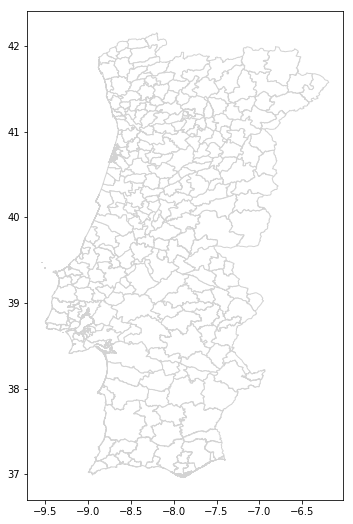

In [156]:
new_map_df.plot(color='white', edgecolor='lightgrey', figsize=(11,9))

## Group per city

In [157]:
qren.groupby('Concelho').count()

,N Proj,Promotor,Designacao,Instrumento,Aviso,Aut Gestao,Org Intermedio,Regiao,Sector,CAE (Rev3),Estrategia de Eficiencia Colectiva,Data de Aprovacao,Investimento Elegivel,Incentivo,N Contribuinte do Promotor,NIF
Concelho,,,,,,,,,,,,,,,,
Abrantes,37,37,37,37,36,37,37,37,37,37,3,37,37,37,37,37
Aguiar da Beira,5,5,5,5,5,5,5,5,5,5,0,5,5,5,5,5
Alandroal,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1
Albergaria-a-Velha,50,50,50,50,50,50,50,50,50,50,1,50,50,50,50,50
Albufeira,21,21,21,21,21,21,21,21,21,21,4,21,21,21,21,21
Alcanena,59,59,59,59,59,59,59,59,59,59,2,59,59,59,59,59
Alcobaça,87,87,87,87,87,87,87,87,87,87,13,87,87,87,87,87
Alcochete,2,2,2,2,2,2,2,2,2,2,0,2,2,2,2,2
Alcoutim,4,4,4,4,4,4,4,4,4,4,1,4,4,4,4,4


merging qren and shapefile

In [0]:
qren.set_index('Concelho').join(new_map_df.set_index('NAME_2'))
pp = new_map_df.join(qren.set_index('Concelho'), on='NAME_2')

In [159]:
pp

,ID_0,ISO,NAME_0,ID_1,NAME_1,ID_2,NAME_2,HASC_2,CCN_2,CCA_2,TYPE_2,ENGTYPE_2,NL_NAME_2,VARNAME_2,geometry,N Proj,Promotor,Designacao,Instrumento,Aviso,Aut Gestao,Org Intermedio,Regiao,Sector,CAE (Rev3),Estrategia de Eficiencia Colectiva,Data de Aprovacao,Investimento Elegivel,Incentivo,N Contribuinte do Promotor,NIF
0,182,PRT,Portugal,1,Évora,1,Évora,PT.EV.EV,0,0705,Concelho,Municipality,None,None,"POLYGON ((-7.79291391372675 38.7650718688966, ...",38171.0,ARALAB - EQUIPAMENTOS DE LABORAToRIO E ELECTRO...,LEDING - INCORPORAcaO DA ILUMINAcaO LED EM CaM...,I&DT Empresas/Projectos Individuais,07/SI/2012,PO Alentejo,IAPMEI,Alentejo,Industria,28992 - Fabricacao de outras maquinas diversas...,NaN,14-Ago-14,165768.0,73899.0,501516590.0,501516590.0
0,182,PRT,Portugal,1,Évora,1,Évora,PT.EV.EV,0,0705,Concelho,Municipality,None,None,"POLYGON ((-7.79291391372675 38.7650718688966, ...",39544.0,AIR OLESA - SISTEMAS E COMPONENTES AERONaUTICO...,I9AIR - PROJETO DE INOVAcaO VOCACIONADO PARA O...,SI Inovacao/Inovacao Produtiva,12/SI/2012,PO FC,IAPMEI,Alentejo,Industria,"30300 - Fabricacao de aeronaves, de veiculos e...",NaN,27-Jun-14,2946252.0,1915058.0,509273556.0,509273556.0
0,182,PRT,Portugal,1,Évora,1,Évora,PT.EV.EV,0,0705,Concelho,Municipality,None,None,"POLYGON ((-7.79291391372675 38.7650718688966, ...",40148.0,"COMPTA - EMERGING BUSINESS, SA",POTENCIAcaO INTERNACIONAL DA COMPTA EMERGING B...,SI Qualificacao PME/Projectos Individuais e de...,10/SI/2012,PO FC,AICEP,Alentejo,Servicos,62010 - Actividades de programacao informatica,NaN,22-Jan-14,233458.0,105017.0,509400825.0,509400825.0
0,182,PRT,Portugal,1,Évora,1,Évora,PT.EV.EV,0,0705,Concelho,Municipality,None,None,"POLYGON ((-7.79291391372675 38.7650718688966, ...",40301.0,"APTOIDE, LDA",APTGLOB - APTOIDE PARTNERS AND PUBLISHERS GLOB...,SI Qualificacao PME/Projectos Individuais e de...,10/SI/2012,PO Alentejo,AICEP,Alentejo,Servicos,58290 - Edicao de outros programas informaticos,NaN,30-Dez-13,192358.0,113343.0,509987184.0,509987184.0
0,182,PRT,Portugal,1,Évora,1,Évora,PT.EV.EV,0,0705,Concelho,Municipality,None,None,"POLYGON ((-7.79291391372675 38.7650718688966, ...",38467.0,"WIDESYS, SOLUcoES INFORMaTICAS, LDA",PLANO DE INTERNACIONALIZAcaO WIDESYS 2013-2015,SI Qualificacao PME/Projectos Individuais e de...,10/SI/2012,PO Alentejo,AICEP,Alentejo,Servicos,62020 - Actividades de consultoria em informatica,NaN,30-Dez-13,101678.0,51070.0,507029402.0,507029402.0
0,182,PRT,Portugal,1,Évora,1,Évora,PT.EV.EV,0,0705,Concelho,Municipality,None,None,"POLYGON ((-7.79291391372675 38.7650718688966, ...",34043.0,MAQUINARTE-INVESTIGAcaO E DESENVOLVIMENTO DE M...,TREEMOVER - CONSTRUcaO DE PROToTIPO E ESTUDO D...,I&DT Empresas/Projectos em Co-promocao,08/SI/2012,PO Alentejo,AdI,Alentejo,Industria,28300 - Fabricacao de maquinas e de tractores ...,NaN,30-Dez-13,534872.0,336350.0,510588840.0,510588840.0
0,182,PRT,Portugal,1,Évora,1,Évora,PT.EV.EV,0,0705,Concelho,Municipality,None,None,"POLYGON ((-7.79291391372675 38.7650718688966, ...",43114.0,"ANToNIO MARQUES - TABACARIA, PAPELARIA, SOCIED...",MODERNIZAcaO DA LOJA,Sistema de Incentivos de Apoio Local a Microem...,01/SIALM/2013,PO Alentejo,PO Alentejo,Alentejo,Comercio,"47620 - Comercio a retalho de jornais, revista...",NaN,20-Dez-13,34432.0,21932.0,506126749.0,506126749.0
0,182,PRT,Portugal,1,Évora,1,Évora,PT.EV.EV,0,0705,Concelho,Municipality,None,None,"POLYGON ((-7.79291391372675 38.7650718688966, ...",42959.0,"eVORAFUNCY - ORGANIZAcaO DE EVENTOS, LDA",eVORAFUNCY,Sistema de Incentivos de Apoio Local a Microem...,01/SIALM/2013,PO Alentejo,PO Alentejo,Alentejo,Turismo,56303 - Pastelarias e casas de cha,NaN,20-Dez-13,46503.0,34193.0,510409261.0,510409261.0
0,182,PRT,Portugal,1,Évora,1,Évora,PT.EV.EV,0,0705,Concelho,Municipality,None,None,"POLYGON ((-7.79291391372675 38.7650718688966, ...",42966.0,"ALENPROJECTOS - CONSULTADORIA DE GESTaO, LDA",ALENPROJECTOS REFORMA 2,Sistema de Incentivos de Apoio Local a Microem...,01/SIALM/2013,PO Alentejo,PO Alentejo,Alentejo

In [0]:
#new_df2.rename(columns={"NAME_2": "Concelho"})

In [160]:
mean_investment = pp['Investimento Elegivel'].groupby([pp['NAME_2']]).mean()
mean_investment

NAME_2
Abrantes                      6.803614e+05
Aguiar da Beira               1.642240e+04
Alandroal                     2.000000e+04
Albergaria-a-Velha            6.788160e+05
Albufeira                     4.324892e+05
Alcanena                      1.563120e+05
Alcobaça                      5.429785e+05
Alcochete                     1.456190e+05
Alcoutim                      3.170000e+04
Alcácer do Sal                8.311840e+05
Alenquer                      6.701932e+05
Alfândega da Fé                        NaN
Alijó                         7.871075e+05
Aljezur                       1.268315e+05
Aljustrel                     1.376722e+07
Almada                        4.312736e+05
Almeida                       8.470600e+04
Almeirim                      1.016847e+05
Almodôvar                              NaN
Alpiarça                      4.899861e+06
Alter do Chão                 1.348870e+05
Alvaiázere                    4.279890e+05
Alvito                        2.027500e+04
Amad

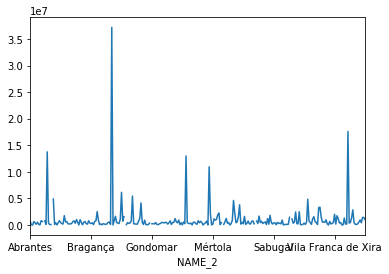

In [161]:
mean_investment.plot()

In [0]:
count_investment = pp['Investimento Elegivel'].groupby([pp['NAME_2']]).count()
count_investment.sort_values(ascending=False)

In [162]:
sector = pp.groupby(by='Sector')['NAME_2'].count()
#sector = pp['Sector'].groupby([pp['NAME_2']]).count()
sector.sort_values(ascending=False)

Sector
Industria          4069
Servicos           2647
Comercio           1599
Turismo             662
Construcao          292
Transportes          88
Outros sectores      18
Energia               4
Name: NAME_2, dtype: int64

In [163]:
total_investment = pp['Investimento Elegivel'].groupby([pp['NAME_2']]).sum()
total_investment.sort_values(ascending=False)

NAME_2
Figueira da Foz           394947289.0
Braga                     325882320.0
Trofa                     290476640.0
Porto                     279523945.0
Vila Nova de Famalicão    241415269.0
Évora                     197274533.0
Marinha Grande            179468139.0
Estarreja                 174503892.0
Paços de Ferreira         133872589.0
Aveiro                    128853540.0
Vila Nova de Gaia         124686660.0
Maia                      121411445.0
Leiria                    110390107.0
Aljustrel                 110137788.0
Santa Maria da Feira      106659408.0
Matosinhos                106220225.0
Santo Tirso                84714111.0
Oliveira de Azeméis        83059005.0
Coimbra                    82787540.0
Ovar                       79344733.0
Covilhã                    75650319.0
Lisboa                     74805392.0
Castro Verde               74394089.0
Barcelos                   72151016.0
Viana do Castelo           71769379.0
Vagos                      70474481.0
Vila 

In [164]:
new_map_df = new_map_df.join(count_investment, on='NAME_2', how='left', lsuffix='_left', rsuffix='_right')
new_map_df.head(15)

,ID_0,ISO,NAME_0,ID_1,NAME_1,ID_2,NAME_2,HASC_2,CCN_2,CCA_2,TYPE_2,ENGTYPE_2,NL_NAME_2,VARNAME_2,geometry,Investimento Elegivel
0,182,PRT,Portugal,1,Évora,1,Évora,PT.EV.EV,0,0705,Concelho,Municipality,None,None,"POLYGON ((-7.79291391372675 38.7650718688966, ...",138
1,182,PRT,Portugal,1,Évora,2,Alandroal,PT.EV.AL,0,0701,Concelho,Municipality,None,None,POLYGON ((-7.259370803833008 38.77350616455101...,1
2,182,PRT,Portugal,1,Évora,3,Arraiolos,PT.EV.AR,0,0702,Concelho,Municipality,None,None,POLYGON ((-7.886110782623234 38.92494583129894...,13
3,182,PRT,Portugal,1,Évora,4,Borba,PT.EV.BO,0,0703,Concelho,Municipality,None,None,POLYGON ((-7.463624954223576 38.92343521118158...,19
4,182,PRT,Portugal,1,Évora,5,Estremoz,PT.EV.ES,0,0704,Concelho,Municipality,None,None,POLYGON ((-7.527699947357121 39.00079727172857...,24
5,182,PRT,Portugal,1,Évora,6,Montemor-o-Novo,PT.EV.MN,0,0706,Concelho,Municipality,None,None,POLYGON ((-8.301545143127441 38.86048507690441...,20
6,182,PRT,Portugal,1,Évora,7,Mora,PT.EV.MR,0,0707,Concelho,Municipality,None,None,"POLYGON ((-8.14205360412592 39.01528930664062,...",4
7,182,PRT,Portugal,1,Évora,8,Mourão,PT.EV.MO,0,0708,Concelho,Municipality,None,None,POLYGON ((-7.315997123718205 38.43931198120146...,2
8,182,PRT,Portugal,1,Évora,9,Portel,PT.EV.PO,0,0709,Concelho,Municipality,None,None,POLYGON ((-7.685286998748722 38.43259811401373...,7
9,182,PRT,Portugal,1,Évora,10,Redondo,PT.EV.RD,0,0710,Concelho,Municipality,None,None,POLYGON ((-7.533260822296143 38.74098205566418...,5


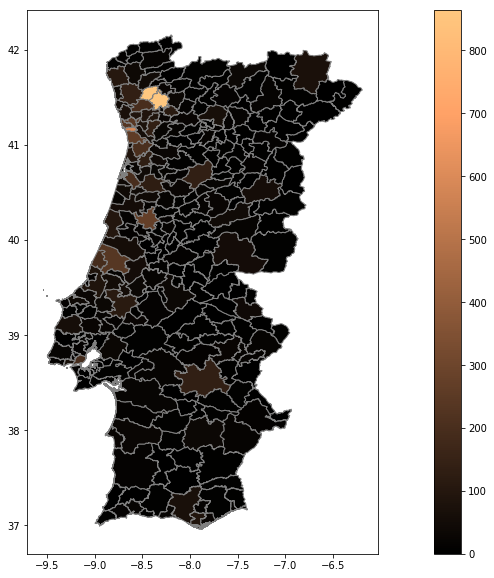

In [165]:
new_map_df["Investimento Elegivel"] = new_map_df["Investimento Elegivel"].astype('int64')
new_map_df.plot(column='Investimento Elegivel',figsize=(20,10), cmap='copper', legend=True, edgecolor='grey')

In [166]:
new_map_df["Investimento Elegivel"].sum()

10251

In [167]:
new_map_df = new_map_df.join(total_investment, on='NAME_2', how='left', lsuffix='_left', rsuffix='_right')
new_map_df.head(15)

,ID_0,ISO,NAME_0,ID_1,NAME_1,ID_2,NAME_2,HASC_2,CCN_2,CCA_2,TYPE_2,ENGTYPE_2,NL_NAME_2,VARNAME_2,geometry,Investimento Elegivel_left,Investimento Elegivel_right
0,182,PRT,Portugal,1,Évora,1,Évora,PT.EV.EV,0,0705,Concelho,Municipality,None,None,"POLYGON ((-7.79291391372675 38.7650718688966, ...",138,197274533.0
1,182,PRT,Portugal,1,Évora,2,Alandroal,PT.EV.AL,0,0701,Concelho,Municipality,None,None,POLYGON ((-7.259370803833008 38.77350616455101...,1,20000.0
2,182,PRT,Portugal,1,Évora,3,Arraiolos,PT.EV.AR,0,0702,Concelho,Municipality,None,None,POLYGON ((-7.886110782623234 38.92494583129894...,13,2583550.0
3,182,PRT,Portugal,1,Évora,4,Borba,PT.EV.BO,0,0703,Concelho,Municipality,None,None,POLYGON ((-7.463624954223576 38.92343521118158...,19,3413079.0
4,182,PRT,Portugal,1,Évora,5,Estremoz,PT.EV.ES,0,0704,Concelho,Municipality,None,None,POLYGON ((-7.527699947357121 39.00079727172857...,24,5669375.0
5,182,PRT,Portugal,1,Évora,6,Montemor-o-Novo,PT.EV.MN,0,0706,Concelho,Municipality,None,None,POLYGON ((-8.301545143127441 38.86048507690441...,20,14358818.0
6,182,PRT,Portugal,1,Évora,7,Mora,PT.EV.MR,0,0707,Concelho,Municipality,None,None,"POLYGON ((-8.14205360412592 39.01528930664062,...",4,1723012.0
7,182,PRT,Portugal,1,Évora,8,Mourão,PT.EV.MO,0,0708,Concelho,Municipality,None,None,POLYGON ((-7.315997123718205 38.43931198120146...,2,21909709.0
8,182,PRT,Portugal,1,Évora,9,Portel,PT.EV.PO,0,0709,Concelho,Municipality,None,None,POLYGON ((-7.685286998748722 38.43259811401373...,7,1980746.0
9,182,PRT,Portugal,1,Évora,10,Redondo,PT.EV.RD,0,0710,Concelho,Municipality,None,None,POLYGON ((-7.533260822296143 38.74098205566418...,5,513920.0


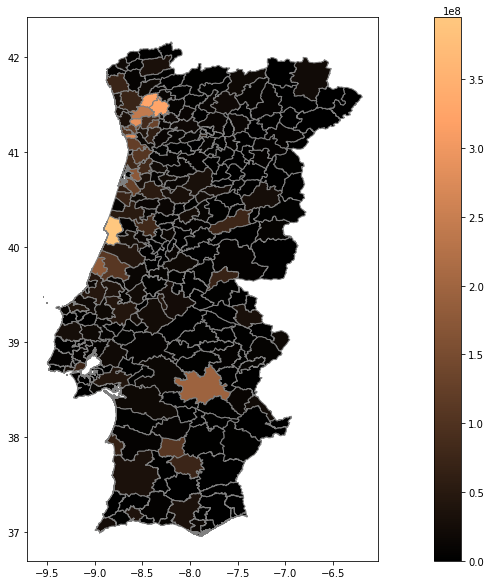

In [168]:
new_map_df["Investimento Elegivel_right"] = new_map_df["Investimento Elegivel_right"].astype('int64')
new_map_df.plot(column='Investimento Elegivel_right',figsize=(20,10), cmap='copper', legend=True, edgecolor='grey')

##Extract startups from list and intersect with QREN

In [0]:
url_starups="https://raw.githubusercontent.com/d-vf/raw-data-fusion-en/gh-pages/data/data-fusion-en.csv"
startups=pd.read_csv(url_starups)

In [170]:
startups

,Entity,NIF,Incorporation (t0),Date of first intervention (t1),Maximum Reported Investment (in t2),Total FINOVA,N. Investors FINOVA,Total Increase in SC from 1st intervention (t1),SC Final Intervention (in t2),Total Increase SC (Inv),NACE,Company not based in PT,Exit,Securities issued,Amount,Issuance date,Share Classes,N. Special Share Classes,Share nominal value,Number of shares,Percentage of special class shares,N. Investors (t2),N. Investors (t2) Funds e Management Firms,N. Investors (t2) Other,Investors 1,Investors 2,Investors 3,Investors 4,Investors 5,Investors 6,Investors 7,Investors 8,Investors 9,Investors 10,Investors 11,Investors 12,Investors 13,Investors 14,Investors 15,Investors 16,Investors 17,Investors 18,Investors 19,Investors 20,Investors 21
0,COLLAB - SOLUCOES INFORMATICAS DE COMUNICACAO ...,503476749,2006,2013,NaN,0.0,0.0,11300.0,61300.0,11300.0,J - Information and communication,NaN,NaN,no records,0.0,0,N,0.0,1.00E+00,61300.0,0.0000,1.0,1.0,0.0,FCR Novabase Capital,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"RADICAL INNOVATION, LDA",510693792,2013,2013,1000000.0,1000000.0,1.0,10000.0,10000.0,8000.0,N - Administrative and support service activities,NaN,NaN,no records,0.0,0,N - LLC,0.0,N - LLC,0.0,0.0000,1.0,1.0,0.0,FCR Novabase Capital Inovacao e Internacionali...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"BRIGHT INNOVATION, LDA",510343856,2012,2012,1500000.0,1500000.0,1.0,25000.0,25000.0,22500.0,N - Administrative and support service activities,NaN,NaN,no records,0.0,0,N - LLC,0.0,N - LLC,0.0,0.0000,1.0,1.0,0.0,FCR Novabase Capital Inovacao e Internacionali...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"POWER DATA, LDA",510731651,2013,2013,250000.0,250000.0,1.0,10000.0,10000.0,8000.0,J - Information and communication,NaN,NaN,no records,0.0,0,N - LLC,0.0,N - LLC,0.0,0.0000,2.0,2.0,0.0,FCR Novabase Capital Inovacao e Internacionali...,FCR Novabase Capital,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"POWERGRID, LDA",509766358,2011,2011,2450000.0,2450000.0,1.0,450000.0,450000.0,400000.0,J - Information and communication,NaN,NaN,no records,0.0,0,N - LLC,0.0,N - LLC,0.0,0.0000,1.0,1.0,0.0,FCR Novabase Capital Inovacao e Internacionali...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,"SMARTGEO, SOLUTIONS, LDA",510465978,2012,2013,100000.0,100000.0,1.0,5000.0,5000.0,4500.0,J - Information and communication,NaN,NaN,no records,0.0,0,N - LLC,0.0,N - LLC,0.0,0.0000,1.0,1.0,0.0,FCR Novabase Capital Inovacao e Internacionali...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,"CITY PULSE, LDA",513136444,2014,2014,2500000.0,2500000.0,1.0,100000.0,100000.0,90000.0,J - Information and communication,NaN,NaN,no records,0.0,0,N - LLC,0.0,N - LLC,0.0,0.0000,1.0,1.0,0.0,FCR Novabase Capital Inovacao e Internacionali...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,"LIVIAN TECHNOLOGIES, LDA",513231412,2014,2014,2500000.0,2500000.0,1.0,10000.0,10000.0,8000.0,J - Information and communication,NaN,NaN,no records,0.0,0,N - LLC,0.0,N - LLC,0.0,0.0000,1.0,1.0,0.0,FCR Novabase Capital Inovacao e Internacionali...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,"DTV RESEARCH, UNIPESSOAL LDA",510302262,2012,2012,2500000.0,2500000.0,1.0,200000.0,200000.0,190000.0,J - Information and communication,NaN,"Sale, 2014",no records,0.0,0,N - LLC,0.0,N - LLC,0.0,0.0000,1.0,1.0,0.0,FCR Novabase Capital Inovacao e Internacionali...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,"WIZDEE-SISTEMAS DE GESTAO DE CONHECIMENTO, S.A.",508979366,2009,2014,760000.0,260000.0,1.0,151000.0,156000.0,9450.0,J - Information and communication,NaN,NaN,no records,0.0,0,Y,6240000.0,1.00E-02,15600000.0,0.4000,2.0,2.0,0.0,FCR Novabase Capital Inovacao e I

In [0]:
startups['NIF'].nunique()

In [0]:
google_sheet_ipr = 'https://docs.google.com/spreadsheets/d/1ckgzHQr-NdwdBaJ-jA6bSgqCBNQgPpcRMKV2JfDQQ-U/export?format=csv&gid=2027582658'
ipr=pd.read_csv(google_sheet_ipr)
ipr

startups = pd.merge(startups, ipr,on='NIF', how='inner')

In [0]:
startups

In [0]:
result = pd.merge(qren,startups,on='NIF', how='inner')

In [174]:
result

,N Proj,Promotor,Designacao,Instrumento,Aviso,Aut Gestao,Org Intermedio,Concelho,Regiao,Sector,CAE (Rev3),Estrategia de Eficiencia Colectiva,Data de Aprovacao,Investimento Elegivel,Incentivo,N Contribuinte do Promotor,NIF,Entity_x,Incorporation (t0),Date of first intervention (t1),Maximum Reported Investment (in t2),Total FINOVA,N. Investors FINOVA,Total Increase in SC from 1st intervention (t1),SC Final Intervention (in t2),Total Increase SC (Inv),NACE,Company not based in PT,Exit,Securities issued,Amount,Issuance date,Share Classes,N. Special Share Classes,Share nominal value,Number of shares,Percentage of special class shares,N. Investors (t2),N. Investors (t2) Funds e Management Firms,N. Investors (t2) Other,Investors 1,Investors 2,Investors 3,Investors 4,Investors 5,Investors 6,Investors 7,Investors 8,Investors 9,Investors 10,Investors 11,Investors 12,Investors 13,Investors 14,Investors 15,Investors 16,Investors 17,Investors 18,Investors 19,Investors 20,Investors 21,Entity_y,District,City,MARCA NACIONAL,LOGOTIPO,PATENTE DE INVENÇÃO NACIONAL,MODELO DE UTILIDADE NACIONAL,PATENTE EUROPEIA,Total
0,36468,"FAIRWAY, MEDICAL TOURISM PORTUGAL, SA",MEDICALPORT,SI Qualificacao PME/Projectos Individuais e de...,10/SI/2012,PO Norte,AICEP,Porto,Norte,Servicos,"63110 - Actividades de processamento de dados,...",NaN,06-Jun-14,216470,97086,510603556,510603556,"FAIRWAY, MEDICAL TOURISM PORTUGAL, S.A.",2013,2013,620000.0,620000.0,3.0,100000.0,101000.0,NaN,J - Information and communication,NaN,NaN,no records,0.0,0,Y,5910000.0,1.00E-02,10100000.0,0.5880,3.0,1.0,2.0,FCR Portugal Ventures Turismo Inovacao,Busy Angels,Eggnest,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"FAIRWAY, MEDICAL TOURISM PORTUGAL, S.A.",Porto,Porto,1.0,1.0,NaN,NaN,NaN,2.0
1,38942,"POWER DATA, LDA",BI CONVERGENCE2UTILITIES - SOLUcaO QUE TRANSFO...,I&DT Empresas/Projectos em Co-promocao,08/SI/2012,PO FC,AdI,Multi-Concelhos,Multi-Regioes,Servicos,62010 - Actividades de programacao informatica,NaN,20-Mai-14,879823,556322,510731651,510731651,"POWER DATA, LDA",2013,2013,250000.0,250000.0,1.0,10000.0,10000.0,8000.0,J - Information and communication,NaN,NaN,no records,0.0,0,N - LLC,0.0,N - LLC,0.0,0.0000,2.0,2.0,0.0,FCR Novabase Capital Inovacao e Internacionali...,FCR Novabase Capital,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"POWER DATA, LDA",Lisboa,Lisboa,1.0,1.0,NaN,NaN,NaN,2.0
2,37900,"FRIDAY: CIeNCIA E ENGENHARIA DO LAZER, SA",FRIDAY CONCEPT I&DT,SI Qualificacao PME/Vale Inovacao,06/SI/2012,PO Centro,IAPMEI,Coimbra,Centro,Servicos,72190 - Outra investigacao e desenvolvimento d...,NaN,05-Mai-14,19000,14250,510445276,510445276,"FRIDAY: CIENCIA E ENGENHARIA DO LAZER, S.A.",2012,2014,1200000.0,1000000.0,1.0,62200.0,64200.0,14600.0,"G - Wholesale and retail trade, repair of moto...",NaN,NaN,no records,0.0,0,Y,2020000.0,1.00E-02,6420000.0,0.3150,1.0,1.0,0.0,FCR Portugal Ventures Turismo Inovacao,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"FRIDAY: CIENCIA E ENGENHARIA DO LAZER, S.A.",Coimbra,Coimbra,2.0,NaN,NaN,NaN,NaN,2.0
3,39560,"FRIDAY: CIeNCIA E ENGENHARIA DO LAZER, SA",WALE: SUBMARINO DE RECREIO E INVESTIGAcaO PARA...,SI Inovacao/Empreendedorismo Qualificado,13/SI/2012,PO Centro,IAPMEI,Coimbra,Centro,Comercio,46690 - Comercio por grosso de outras maquinas...,NaN,17-Dez-13,313679,203892,510445276,510445276,"FRIDAY: CIENCIA E ENGENHARIA DO LAZER, S.A.",2012,2014,1200000.0,1000000.0,1.0,62200.0,64200.0,14600.0,"G - Wholesale and retail trade, repair of moto...",NaN,NaN,no records,0.0,0,Y,2020000.0,1.00E-02,6420000.0,0.3150,1.0,1.0,0.0,FCR Portugal Ventures Turismo Inovacao,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"FRIDAY: CIENCIA E ENGENHARIA DO LAZER, S.A.",Coimbra,Coimbra,2.0,NaN,NaN,NaN,NaN,2.0
4,31693,"FRIDAY: CIeNCIA E ENGENHARIA DO LAZER, SA",FRIDAY CONCEPT - DESENVOLVIMENTO DE EQUIPAMENT...,SI Qualificacao PME/Vale Inovacao,06/SI/2012,P

In [175]:
result['NIF'].nunique()

92

In [0]:
aa = result.loc[result['N. Investors FINOVA']>=1]

In [0]:
aa['NIF'].nunique()

In [0]:
result.groupby('Concelho').count()

In [178]:
count_startups = result['NACE'].groupby([result['Concelho']]).count()
count_startups.sort_values(ascending=False)

Concelho
Coimbra                   38
Porto                     33
Multi-Concelhos           20
Cantanhede                15
Lisboa                    14
Oeiras                    10
Braga                      8
Maia                       7
Matosinhos                 6
Valongo                    5
Vila Nova de Gaia          4
Évora                      4
Covilhã                    4
Guimarães                  3
Aveiro                     3
Serpa                      3
Beja                       2
Ílhavo                     2
Torres Vedras              2
Viseu                      2
Almada                     2
Mafra                      1
Paços de Ferreira          1
Chaves                     1
Castelo Branco             1
Sobral de Monte Agraço     1
Borba                      1
Vila Verde                 1
Name: NACE, dtype: int64

In [0]:
result['NACE'].groupby([result['Concelho']]).value_counts()

In [0]:
startupsmap = result.join(map_df.set_index('NAME_2'), on='Concelho',how='inner', lsuffix='_left', rsuffix='_right')
startupsmap.head()

In [0]:
startupsmap["Total"] = startupsmap["Total"].astype('int64')

In [180]:
startupsmap

,N Proj,Promotor,Designacao,Instrumento,Aviso,Aut Gestao,Org Intermedio,Concelho,Regiao,Sector,CAE (Rev3),Estrategia de Eficiencia Colectiva,Data de Aprovacao,Investimento Elegivel,Incentivo,N Contribuinte do Promotor,NIF,Entity_x,Incorporation (t0),Date of first intervention (t1),Maximum Reported Investment (in t2),Total FINOVA,N. Investors FINOVA,Total Increase in SC from 1st intervention (t1),SC Final Intervention (in t2),Total Increase SC (Inv),NACE,Company not based in PT,Exit,Securities issued,Amount,Issuance date,Share Classes,N. Special Share Classes,Share nominal value,Number of shares,Percentage of special class shares,N. Investors (t2),N. Investors (t2) Funds e Management Firms,N. Investors (t2) Other,...,Investors 5,Investors 6,Investors 7,Investors 8,Investors 9,Investors 10,Investors 11,Investors 12,Investors 13,Investors 14,Investors 15,Investors 16,Investors 17,Investors 18,Investors 19,Investors 20,Investors 21,Entity_y,District,City,MARCA NACIONAL,LOGOTIPO,PATENTE DE INVENÇÃO NACIONAL,MODELO DE UTILIDADE NACIONAL,PATENTE EUROPEIA,Total,ID_0,ISO,NAME_0,ID_1,NAME_1,ID_2,HASC_2,CCN_2,CCA_2,TYPE_2,ENGTYPE_2,NL_NAME_2,VARNAME_2,geometry
0,36468,"FAIRWAY, MEDICAL TOURISM PORTUGAL, SA",MEDICALPORT,SI Qualificacao PME/Projectos Individuais e de...,10/SI/2012,PO Norte,AICEP,Porto,Norte,Servicos,"63110 - Actividades de processamento de dados,...",NaN,06-Jun-14,216470,97086,510603556,510603556,"FAIRWAY, MEDICAL TOURISM PORTUGAL, S.A.",2013,2013,620000.0,620000.0,3.0,100000.0,101000.0,NaN,J - Information and communication,NaN,NaN,no records,0.0,0,Y,5910000.0,1.00E-02,1.010000e+07,0.58800,3.0,1.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"FAIRWAY, MEDICAL TOURISM PORTUGAL, S.A.",Porto,Porto,1.0,1.0,NaN,NaN,NaN,2,182,PRT,Portugal,15,Porto,219,PT.PO.PO,0,1312,Concelho,Municipality,None,None,(POLYGON ((-8.68626880645752 41.16044998168968...
13,38250,"CARDMOBILI - DESENVOLVIMENTO DE SOFTWARE, SA",CM_INTERNACIONALIZA,SI Qualificacao PME/Projectos Individuais e de...,10/SI/2012,PO Norte,AICEP,Porto,Norte,Servicos,62090 - Outras actividades relacionadas com as...,NaN,29-Jan-14,184217,82515,508559588,508559588,"CARDMOBILI DESENVOLVIMENTO DE SOFTWARE, S.A.",2008,2013,1150000.0,1150000.0,1.0,25000.0,75000.0,25000.0,J - Information and communication,NaN,NaN,no records,0.0,0,N,0.0,1.00E+00,7.500000e+04,0.00000,2.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"CARDMOBILI DESENVOLVIMENTO DE SOFTWARE, S.A.",Porto,Porto,1.0,NaN,NaN,NaN,NaN,1,182,PRT,Portugal,15,Porto,219,PT.PO.PO,0,1312,Concelho,Municipality,None,None,(POLYGON ((-8.68626880645752 41.16044998168968...
15,11940,"CARDMOBILI - DESENVOLVIMENTO DE SOFTWARE, SA",V-MCARD - VIRTUAL MOBILE CARD - SERVIcO DE VIR...,I&DT Empresas/Projectos Individuais,32/SI/2009,PO Norte,IAPMEI,Porto,Norte,Servicos,62090 - Outras actividades relacionadas com as...,NaN,31-Mar-10,203595,149755,508559588,508559588,"CARDMOBILI DESENVOLVIMENTO DE SOFTWARE, S.A.",2008,2013,1150000.0,1150000.0,1.0,25000.0,75000.0,25000.0,J - Information and communication,NaN,NaN,no records,0.0,0,N,0.0,1.00E+00,7.500000e+04,0.00000,2.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"CARDMOBILI DESENVOLVIMENTO DE SOFTWARE, S.A.",Porto,Porto,1.0,NaN,NaN,NaN,NaN,1,182,PRT,Portugal,15,Porto,219,PT.PO.PO,0,1312,Concelho,Municipality,None,None,(POLYGON ((-8.68626880645752 41.16044998168968...
16,12674,"CARDMOBILI - DESENVOLVIMENTO DE SOFTWARE, SA",REFORcO COMPETITITVO E INTERNACIONALIZAcaO DA ...,SI Qualificacao PME/Projectos Individuais e de...,29/SI/2009,PO Norte,AICEP,Porto,Norte,Servicos,62090 - Outras actividades relacionadas com as...,NaN,16-Mar-10,314517,141533,508559588,508559588,"CARDMOBILI DESENVOLVIMENTO DE SOFTWARE, S.A.",2008,2013,1150000.0,1150000.0,1.0,25000.0,75000.0,25000.0,J - Information and communication,NaN,NaN,no records,0.0,0,N,0.0,1.00E+00,7.500000e+04,0.00000,2.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

In [0]:
startupsmap["Investimento Elegivel"] = startupsmap["Investimento Elegivel"].astype('int64')

x= startupsmap.plot(column='Investimento Elegivel', figsize=(20,10), cmap='copper', legend=True, edgecolor='grey')

##P2020

Check 2014-2019, limit to 2016
### Mailand
* http://www.poci-compete2020.pt/Projetos
* http://norte2020.pt/programa/projetos-lista
* http://www.centro.portugal2020.pt/index.php/projetos-aprovados
* https://algarve2020.pt/info/projetos-aprovados
* https://lisboa.portugal2020.pt/np4/47.html
* http://www.alentejo.portugal2020.pt/index.php/projetos-aprovados/category/73-projetos-aprovados


* http://poacores2020.azores.gov.pt/tipos_de_candidaturas/candidaturas_aprovadas/
* http://www.idr.gov-madeira.pt/m1420/Conteudo.aspx?IDc=m1420-candidaturas&IDsm=m1420-candidaturas--aprovadas

In [0]:
google_sheet_p2020 = 'https://docs.google.com/spreadsheets/d/1oHKS62i-KLJF0KEbxh17Y_p0qT4cQ1oG/export?format=csv&gid=881653755'
p2020=pd.read_csv(google_sheet_p2020,header=None, sep=',')
p2020

In [0]:
fp = "https://docs.google.com/spreadsheets/d/1360sERZvQplwalNwcokxRUP9pCXgNWViwr6A0jsurHg/pub?output=csv" #shapefile
df = pd.read_csv(fp)

## Alentejo

In [0]:
google_sheet_url_alentejo = 'https://docs.google.com/spreadsheets/d/1Y7mjWSeepzTsVFObgIcJMBtynqfMMWHWs4ea2ECEPW4/export?format=csv&gid=955981837'
p2020_alentejo=pd.read_csv(google_sheet_url_alentejo, encoding='ISO 8859-1',header=None, sep=',')
p2020_alentejo

## Norte

In [0]:
google_sheet_url = 'https://docs.google.com/spreadsheets/d/1S9pmj_QWvHmJ834rPiUduueviU6nlDc9hPkXYWlzQE0/export?format=csv&gid=149876234'
p2020_norte=pd.read_csv(google_sheet_url,header=None, sep=',')
p2020_norte

In [0]:
new_header = p2020_norte.iloc[0]
p2020_norte = p2020_norte[1:]
p2020_norte.columns = new_header
p2020_norte

In [0]:
p2020_norte.dtypes

In [0]:
p2020_norte['NIF Beneficiário'] = p2020_norte['NIF Beneficiário'].astype(np.int64)

In [0]:
p2020_norte['NIF'] = p2020_norte['NIF Beneficiário']

In [0]:
result_norte = pd.merge(startups,
                 p2020_norte,
                 on='NIF',
                 how='inner')

In [0]:
result_norte

In [0]:
result_norte['NIF'].nunique()

In [0]:
result_norte['CAE Projeto'].value_counts().plot(kind='bar')

In [0]:
result_norte['NACE'].value_counts().plot(kind='bar')

In [0]:
result_norte['NUTIII'].value_counts().plot(kind='bar')

## Centro

In [0]:
google_sheet_url = 'https://docs.google.com/spreadsheets/d/1f4jPfFk6_1zxMJME_MDRDjc4Wmf9_4BmSf5_3vQpLuQ/export?format=csv&gid=501845672'
p2020centro=pd.read_csv(google_sheet_url,header=None, sep=',')

In [0]:
new_header = p2020centro.iloc[0]
p2020centro = p2020centro[1:]
p2020centro.columns = new_header
p2020centro

In [0]:
p2020centro.dtypes

In [0]:
p2020centro['NIF | TIN'] = p2020centro['NIF | TIN'].astype(np.int64)

In [0]:
p2020centro['NIF'] = p2020centro['NIF | TIN']

In [0]:
result_centro = pd.merge(p2020_norte,
                 p2020centro,
                 on='NIF',
                 how='inner')

In [0]:
result_centro

In [0]:
result_centro['NIF'].nunique()

In [0]:
frames = [result,result_norte,result_centro]
df_keys = pd.concat(frames, sort=True)
df_keys

In [0]:
df_keys['NIF'].nunique()

## IPR

In [181]:
google_sheet_ipr = 'https://docs.google.com/spreadsheets/d/1ckgzHQr-NdwdBaJ-jA6bSgqCBNQgPpcRMKV2JfDQQ-U/export?format=csv&gid=0'
ipr=pd.read_csv(google_sheet_ipr)
ipr
#fp = "/content/drive/My Drive/concelhos-shapefile/Copy of IPR Startups" 

,District,City,NIF,IPR (INPI),Number,Owner,Content,Content.1
0,Lisboa,Lisboa,503476749,NaN,NaN,NaN,NaN,NaN
1,Setúbal,Almada,510693792,NaN,NaN,NaN,NaN,NaN
2,Lisboa,Torres Vedras,510343856,NaN,NaN,NaN,NaN,NaN
3,Lisboa,Lisboa,510731651,MARCA NACIONAL,438260.0,"POWERDATA SOLUTIONS, S.L.",POWERDATA,MISTO
4,Lisboa,Lisboa,510731651,LOGOTIPO,33236.0,POWER DATA LDA,POWERDATA - BUSINESS INTELLIGENCE,MISTO
5,Lisboa,Torres Vedras,509766358,LOGOTIPO,33235.0,POWERGRID LDA,POWERGRID - NETWORK INTELLIGENCE,MISTO
6,Castelo Branco,Castelo Branco,510465978,MARCA NACIONAL,538473.0,"SMARTGEO SOLUTIONS, LDA.",BIZIDOG,VERBAL
7,Castelo Branco,Castelo Branco,510465978,LOGOTIPO,33392.0,"SMARTGEO SOLUTIONS, LDA.",SMARTGEO,MISTO
8,Porto,Matosinhos,513136444,NaN,NaN,NaN,NaN,NaN
9,Santarém,Benavente,513231412,NaN,NaN,NaN,NaN,NaN


In [182]:
ipr.nunique()

District       21
City           49
NIF           180
IPR (INPI)      6
Number        285
Owner         140
Content       266
Content.1       3
dtype: int64

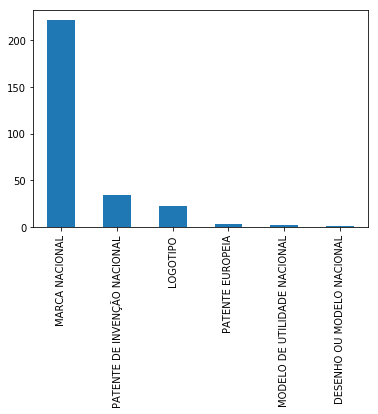

In [183]:
ipr['IPR (INPI)'].value_counts().plot(kind='bar')

In [0]:
ipr['City'].value_counts().plot(kind='bar')

In [184]:
ipr['IPR (INPI)'].groupby([ipr['City']]).value_counts()

City                    IPR (INPI)                  
Alcácer do Sal          MARCA NACIONAL                  17
Almada                  MARCA NACIONAL                   6
                        PATENTE DE INVENÇÃO NACIONAL     5
                        LOGOTIPO                         1
                        PATENTE EUROPEIA                 1
Angra do Heroísmo       MARCA NACIONAL                   3
Arcos de Valdevez       MARCA NACIONAL                   1
Arruda dos Vinhos       MARCA NACIONAL                   4
                        LOGOTIPO                         1
                        PATENTE DE INVENÇÃO NACIONAL     1
Aveiro                  MARCA NACIONAL                   2
Beja                    MARCA NACIONAL                   1
Braga                   MARCA NACIONAL                   8
                        LOGOTIPO                         2
                        DESENHO OU MODELO NACIONAL       1
Cantanhede              MARCA NACIONAL                   8
   

In [0]:
ipr['IPR (INPI)'].groupby([ipr['NIF']]).value_counts()

In [0]:
#ppr = ipr.join(qren.set_index('Concelho'), on='Unnamed: 1',how='left', lsuffix='_left', rsuffix='_right')
ppr = ipr.join(map_df.set_index('NAME_1'), on='City',how='left', lsuffix='_left', rsuffix='_right')
ppr

In [185]:
ipr.groupby('City').count()

,District,NIF,IPR (INPI),Number,Owner,Content,Content.1
City,,,,,,,
Alcácer do Sal,17,17,17,17,17,17,17
Almada,15,15,13,13,13,13,7
Anadia,1,1,0,0,0,0,0
Angra do Heroísmo,3,3,3,3,3,3,3
Arcos de Valdevez,1,1,1,1,1,1,1
Arruda dos Vinhos,6,6,6,6,6,6,5
Aveiro,5,5,2,2,2,2,2
Beja,1,1,1,1,1,1,1
Benavente,2,2,0,0,0,0,0


## Networks

### Get VC Network

### Merge with QREN

### Check companies that:

* VC and Funds
* Finova and QREN

* Per area and NACE

In [186]:
# Build your graph
G_compete=nx.from_pandas_edgelist(qren, 'Instrumento', 'N Contribuinte do Promotor',edge_attr=True, create_using=nx.DiGraph)

#Add edges
#->QREN -> Instrumento
qren['Instrumento'].unique()

array(['SI Inovacao/Inovacao Produtiva',
       'I&DT Empresas/Projectos Individuais',
       'SI Qualificacao PME/Vale Inovacao',
       'SI Qualificacao PME/Projectos Individuais e de Cooperacao',
       'SI Inovacao/Empreendedorismo Qualificado',
       'I&DT Empresas/Projectos em Co-promocao',
       'SI Qualificacao PME/Projectos Conjuntos',
       'I&DT Empresas/Projectos em Co-promocao/Regime Especial',
       'Sistema de Incentivos de Apoio Local a Microempresas (SIALM)',
       'SI Inovacao/Projectos do Regime Especial',
       'SI Inovacao/Projectos de Interesse Estrategico',
       'Criacao e Reforco de competencias Internas de I&DT/Nucleos de I&DT',
       'I&DT Empresas/Projectos Individuais/Regime Especial',
       'I&DT Empresas/Vale I&DT', 'I&DT Empresas/Projectos Mobilizadores',
       'Projectos transitados do QCA III', 'I&DT Colectiva'], dtype=object)

In [0]:
G_compete.add_node("QREN") 
G_compete.add_edge("QREN", 'I&DT Empresas/Projectos Individuais')
G_compete.add_edge("QREN", 'SI Qualificacao PME/Vale Inovacao')
G_compete.add_edge("QREN", 'SI Qualificacao PME/Projectos Individuais e de Cooperacao')
G_compete.add_edge("QREN", 'SI Inovacao/Empreendedorismo Qualificado')
G_compete.add_edge("QREN", 'I&DT Empresas/Projectos em Co-promocao')
G_compete.add_edge("QREN", 'SI Qualificacao PME/Projectos Conjuntos')
G_compete.add_edge("QREN", 'I&DT Empresas/Projectos em Co-promocao/Regime Especial')
G_compete.add_edge("QREN", 'Sistema de Incentivos de Apoio Local a Microempresas (SIALM)')
G_compete.add_edge("QREN", 'SI Inovacao/Projectos do Regime Especial')
G_compete.add_edge("QREN", 'SI Inovacao/Projectos de Interesse Estrategico')
G_compete.add_edge("QREN", 'Criacao e Reforco de competencias Internas de I&DT/Nucleos de I&DT')
G_compete.add_edge("QREN", 'I&DT Empresas/Projectos Individuais/Regime Especial')
G_compete.add_edge("QREN", 'I&DT Empresas/Vale I&DT')
G_compete.add_edge("QREN", 'I&DT Empresas/Projectos Mobilizadores')
G_compete.add_edge("QREN", 'Projectos transitados do QCA III')
G_compete.add_edge("QREN", 'I&DT Colectiva')

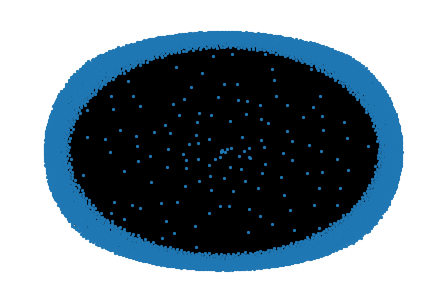

In [188]:
# Plot it
nx.draw(G_compete, with_labels=False,node_size=5)
plt.show()

In [189]:
G_compete.nodes()
G_compete.edges()

OutEdgeView([('SI Inovacao/Inovacao Produtiva', 501527753), ('SI Inovacao/Inovacao Produtiva', 504358405), ('SI Inovacao/Inovacao Produtiva', 502068213), ('SI Inovacao/Inovacao Produtiva', 510265790), ('SI Inovacao/Inovacao Produtiva', 510801242), ('SI Inovacao/Inovacao Produtiva', 509273556), ('SI Inovacao/Inovacao Produtiva', 504304089), ('SI Inovacao/Inovacao Produtiva', 508589738), ('SI Inovacao/Inovacao Produtiva', 504901095), ('SI Inovacao/Inovacao Produtiva', 510241476), ('SI Inovacao/Inovacao Produtiva', 503226033), ('SI Inovacao/Inovacao Produtiva', 502631228), ('SI Inovacao/Inovacao Produtiva', 500136076), ('SI Inovacao/Inovacao Produtiva', 502417749), ('SI Inovacao/Inovacao Produtiva', 507439589), ('SI Inovacao/Inovacao Produtiva', 502009225), ('SI Inovacao/Inovacao Produtiva', 505786494), ('SI Inovacao/Inovacao Produtiva', 501761721), ('SI Inovacao/Inovacao Produtiva', 502961759), ('SI Inovacao/Inovacao Produtiva', 509208363), ('SI Inovacao/Inovacao Produtiva', 505838168), 

In [0]:
nx.algorithms.degree_centrality(G_compete) 


In [191]:
nx.average_degree_connectivity(G_compete) # For a node of degree k - What is the average of its neighbours' degree?


{1: 0,
 2: 0.002890173410404624,
 3: 0,
 4: 0,
 5: 0,
 6: 0.75,
 12: 1.5,
 14: 2.142857142857143,
 16: 438.25,
 23: 1.5217391304347827,
 69: 1.0144927536231885,
 85: 2.4941176470588236,
 236: 2.016949152542373,
 244: 1.2745901639344261,
 433: 1.0646651270207852,
 435: 1.9655172413793103,
 470: 1.9553191489361703,
 1344: 1.4501488095238095,
 2262: 1.4084880636604775,
 2717: 1.2108943687891056}

In [0]:
components = G_compete.clusters()
G_compete.vs[components[0]]['color'] = 'red'
G_compete.vs[components[1]]['color'] = 'blue'
ig.plot(G_compete)

In [0]:
### Network Startups

In [0]:
#Edges
url_Edges ='https://raw.githubusercontent.com/d-vf/RAW-Network-Graph/master/RAW%20-%20Network%20Graph/Venture%20Capital%20Ecosystem%20(netwok)%20-%20Venture%20Capital%20Ecosystem%20(PT)-edges.csv'
#Nodes
url_Nodes = 'https://raw.githubusercontent.com/d-vf/RAW-Network-Graph/master/RAW%20-%20Network%20Graph/Venture%20Capital%20Ecosystem%20(netwok)%20-%20Venture%20Capital%20Ecosystem%20(PT)-nodes.csv'

edges=pd.read_csv(url_Edges)


G = nx.from_pandas_edgelist(edges, 'From Name', 'To Name', ['Weight'])

nodes = pd.read_csv(url_Nodes)
data = nodes.set_index('Name').to_dict('index').items()
G.add_nodes_from(data)

In [194]:
nodes

,Type,Name,Description,Image,Reference,NACE,Country,starting date,ending date
0,Universities,"Taguspark, SA",NaN,NaN,NaN,N - Administrative and support service activities,PT,2011.0,NaN
1,Other,Sindicato Nac. Quadros e Técnicos Bancários,NaN,NaN,NaN,S - Other services activities,PT,1983.0,NaN
2,Venture Capital Funds,Fundo ISQ Capital,NaN,NaN,NaN,K - Financial and insurance activities,PT,2005.0,NaN
3,Limited Partners (LPs)/SCR´s - Outside PT,Investo,NaN,NaN,NaN,Foreign Company,USA,2011.0,NaN
4,Corporate,Cisco Investments,NaN,NaN,NaN,Foreign Company,USA,1984.0,NaN
5,Limited Partners (LPs)/SCR´s - Outside PT,Herrick Partners,NaN,NaN,NaN,K - Financial and insurance activities,USA,2006.0,NaN
6,Corporate,"Mota­ Engil, Engenharia e Construção , S. A.",NaN,NaN,NaN,C - Manufacturing,PT,2006.0,NaN
7,Corporate,NEUTROPLAST ­ INDÚSTRIA DE EMBALAGENS PLÁSTICA...,NaN,NaN,NaN,C - Manufacturing,PT,2015.0,NaN
8,Corporate,Grupo EDP,NaN,NaN,NaN,"D - Electricity, gas, steam and air conditioni...",PT,2005.0,NaN
9,Corporate,"Critical Software, S.A.",NaN,NaN,NaN,J - Information and communication,PT,2012.0,NaN


In [196]:
print(G.edges(data=True))

[('Taguspark, SA', 'FCR ISTART I', {'Weight': 1}), ('FCR ISTART I', 'Brisa, SA', {'Weight': 1}), ('FCR ISTART I', 'BES/Novo Banco', {'Weight': 1}), ('FCR ISTART I', 'SAKPROJECT INTERNATIONAL, S.A', {'Weight': 1}), ('FCR ISTART I', 'QAMINE LIMITED', {'Weight': 1}), ('FCR ISTART I', 'QAMINE PORTUGAL, S.A', {'Weight': 1}), ('FCR ISTART I', 'ECOFOOT, S.A.', {'Weight': 1}), ('FCR ISTART I', 'LASERLEAP TECHNOLOGIES,S.A.', {'Weight': 1}), ('FCR ISTART I', 'MUZZLEY, S.A.', {'Weight': 1}), ('FCR ISTART I', 'FASTINOV, S.A.', {'Weight': 1}), ('FCR ISTART I', 'EQUIGERMINAL, S.A.', {'Weight': 1}), ('FCR ISTART I', 'HEARTGENETICS GENETICS AND BIOTECHNOLOGY, S.A.', {'Weight': 1}), ('FCR ISTART I', 'Caixa Capital SCR, SA', {'Weight': 1}), ('FCR ISTART I', 'ES Ventures SCR, SA', {'Weight': 1}), ('FCR ISTART I', 'Novabase Capital SCR, SA', {'Weight': 1}), ('FCR ISTART I', 'FINOVA - Fundo de Apoio ao Financiamento à Inovação', {'Weight': 1}), ('Sindicato Nac. Quadros e Técnicos Bancários', 'FCR Portugal 

In [197]:
print(G.nodes(data=True))

[('Taguspark, SA', {'Type': 'Universities', 'Description': nan, 'Image': nan, 'Reference': nan, 'NACE': 'N - Administrative and support service activities', 'Country': 'PT', 'starting date': 2011.0, 'ending date': nan}), ('FCR ISTART I', {'Type': 'Venture Capital Funds', 'Description': nan, 'Image': nan, 'Reference': nan, 'NACE': 'K - Financial and insurance activities', 'Country': 'PT', 'starting date': 2011.0, 'ending date': nan}), ('Sindicato Nac. Quadros e Técnicos Bancários', {'Type': 'Other', 'Description': nan, 'Image': nan, 'Reference': nan, 'NACE': 'S - Other services activities', 'Country': 'PT', 'starting date': 1983.0, 'ending date': nan}), ('FCR Portugal Ventures Universitas', {'Type': 'Venture Capital Funds', 'Description': nan, 'Image': nan, 'Reference': nan, 'NACE': 'K - Financial and insurance activities', 'Country': 'PT', 'starting date': 2011.0, 'ending date': nan}), ('Fundo ISQ Capital', {'Type': 'Venture Capital Funds', 'Description': nan, 'Image': nan, 'Reference'

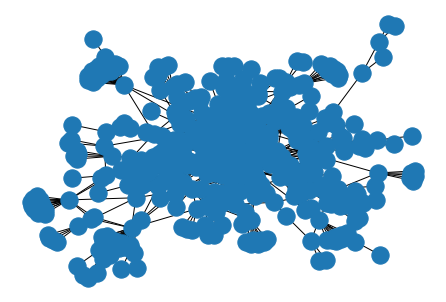

In [198]:
nx.draw(G)
plt.show()

In [199]:
nx.get_node_attributes(G,'name')
nodes

,Type,Name,Description,Image,Reference,NACE,Country,starting date,ending date
0,Universities,"Taguspark, SA",NaN,NaN,NaN,N - Administrative and support service activities,PT,2011.0,NaN
1,Other,Sindicato Nac. Quadros e Técnicos Bancários,NaN,NaN,NaN,S - Other services activities,PT,1983.0,NaN
2,Venture Capital Funds,Fundo ISQ Capital,NaN,NaN,NaN,K - Financial and insurance activities,PT,2005.0,NaN
3,Limited Partners (LPs)/SCR´s - Outside PT,Investo,NaN,NaN,NaN,Foreign Company,USA,2011.0,NaN
4,Corporate,Cisco Investments,NaN,NaN,NaN,Foreign Company,USA,1984.0,NaN
5,Limited Partners (LPs)/SCR´s - Outside PT,Herrick Partners,NaN,NaN,NaN,K - Financial and insurance activities,USA,2006.0,NaN
6,Corporate,"Mota­ Engil, Engenharia e Construção , S. A.",NaN,NaN,NaN,C - Manufacturing,PT,2006.0,NaN
7,Corporate,NEUTROPLAST ­ INDÚSTRIA DE EMBALAGENS PLÁSTICA...,NaN,NaN,NaN,C - Manufacturing,PT,2015.0,NaN
8,Corporate,Grupo EDP,NaN,NaN,NaN,"D - Electricity, gas, steam and air conditioni...",PT,2005.0,NaN
9,Corporate,"Critical Software, S.A.",NaN,NaN,NaN,J - Information and communication,PT,2012.0,NaN


In [0]:
#add the node attributes from dictionaries using set_node_attributes:
nodes = pd.DataFrame (nodes)
nodes
nx.set_node_attributes(G, nodes.set_index('Name').to_dict('index'))

In [201]:
G.nodes
#list(G.nodes(data=True))

NodeView(('Taguspark, SA', 'FCR ISTART I', 'Sindicato Nac. Quadros e Técnicos Bancários', 'FCR Portugal Ventures Universitas', 'Fundo ISQ Capital', 'SPHERAA - PRODUÇÃO DE ENERGIA, LDA', 'IBERMAROS-EQUIPAMENTOS INDUSTRIAIS, S.A.', 'Investo', 'UNBABEL, INC.', 'Cisco Investments', 'VENIAM, INC.', 'Herrick Partners', 'YDREAMS - INFORMÁTICA, S.A.', 'Mota\xad Engil, Engenharia e Construção , S. A.', 'BERD - PROJECTO, INVESTIGAÇÃO E ENGENHARIA DE PONTES S.A.', 'NEUTROPLAST \xad INDÚSTRIA DE EMBALAGENS PLÁSTICAS S.A.', 'BEYONDEVICES, S.A.', 'Grupo EDP', 'EDP Inovação', 'EDP Ventures SGPS', 'WINDPLUS, S.A.', 'EIDT - ENGENHARIA, INOVAÇÃO E DESENVOLVIMENTO TECNOLÓGICO, S.A.', 'Critical Software, S.A.', 'CBRA GENOMICS, S.A.', 'FEEDZAI - CONSULTADORIA E INOVAÇÃO TECNOLÓGICA, S.A.', 'Brisa, SA', 'FCR F-HITEC', 'SIBS', 'Verizon Ventures', 'Cane Investments LLC', 'Yamaha Motor Ventures', 'Orange Digital Ventures', 'Liberty Global Ventures', 'CUF \xad Companhia União Fabril, SGPS, S.A', 'YD YNVISIBLE, 

In [0]:
# The order of the node for networkX is the following order:
G.nodes()
# Thus, we cannot give directly the 'myvalue' column to netowrkX, we need to arrange the order!
 
# Here is the tricky part: I need to reorder carac, to assign the good color to each node
nodes= nodes.set_index('Name')
nodes=nodes.reindex(G.nodes())


# And I need to transform my categorical column in a numerical value: group1->1, group2->2...
nodes['Type']=pd.Categorical(nodes['Type'])
nodes['Type'].cat.codes
 
# Custom the nodes:
nx.draw(G, with_labels=False, node_color=nodes['Type'].cat.codes, cmap=plt.cm.Set1, node_size=15)

In [202]:
nodes['Type'].unique()

array(['Universities', 'Other', 'Venture Capital Funds',
       'Limited Partners (LPs)/SCR´s - Outside PT', 'Corporate', 'Banks',
       'Targeted companies (startups)', 'SPV´s',
       'Limited Partners (LPs)/SCR´s'], dtype=object)

In [0]:
colors = []

for node in G:
    if node in (nodes['Type'] == 'Universities'):
        colors.append("blue")
    if node in (nodes['Type'] == 'Targeted companies (startups)'):
        colors.append("red")
    if node in (nodes['Type'] == 'Venture Capital Funds'):
        colors.append("black")
    if node in (nodes['Type'] == 'Limited Partners (LPs)/SCR´s - Outside PT'):
        colors.append("grey")
    if node in (nodes['Type'] == 'Corporate'):
        colors.append("orange")
    if node in (nodes['Type'] == 'Banks'):
        colors.append("green")
    if node in (nodes['Type'] == 'SPV´s'):
        colors.append("pink")
    if node in (nodes['Type'] == 'Limited Partners (LPs)/SCR´s'):
        colors.append("black")
    elif node in (nodes['Type']== 'Other'): 
        colors.append("green")
nx.draw(G, with_labels=False, node_size=150, node_color=colors)

In [0]:
import community
parts = community.best_partition(G)
values = [parts.get(node) for node in G.nodes()]

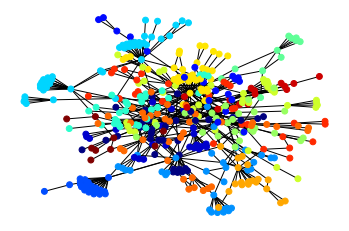

In [204]:
plt.axis("off")
nx.draw(G, cmap = plt.get_cmap("jet"), node_color = values, node_size = 35, with_labels = False)

In [205]:
nx.average_clustering(G)
print(nx.info(G))

Name: 
Type: Graph
Number of nodes: 424
Number of edges: 578
Average degree:   2.7264


In [206]:
from networkx.algorithms import community
import itertools
k = 1
comp = community.girvan_newman(G)
for communities in itertools.islice(comp, k):
    print(tuple(sorted(c) for c in communities))

(['2BPARTNER SCR, SA', '5ENSESINFOOD, S.A.', 'A. Silva Matos II - Investimentos, SA', 'A123Systems', 'A2B, SGPS', 'ABYSSAL, S.A.', 'ADDVOLT, S.A.', 'ADFAMILIES PUBLICIDADE, S.A.', 'ADVANCED CYCLONE SYSTEMS, S.A.', 'AEP - Associação Empresarial de Portugal (ou entidade por si dominada)', 'AFSA \xadSGPS, S.A', 'AIP –CCI', 'ALFAMA - INVESTIGAÇÃO E DESENVOLVIMENTO DE PRODUTOS FARMACÊUTICOS LDA', 'ALFAMA INC.', 'ALLIS UBBO INFORMATION SYSTEMS, LDA', 'ALTAKITIN, S.A.', 'ALTURA PUBLISHING, S.A.', 'AMANHÃ GLOBAL, S.A.', 'ANJE', 'APTOIDE, S.A.', 'ASINUS ATLANTICUS, S.A.', 'ATP- ATLÂNTICO TRADE PARTNERS - IMPORTAÇÃO E EXPORTAÇÃO DE PRODUTOS ALIMENTARES, LDA', 'AUGRPUBLISHER, S.A', 'Agro Consultores,Lda', 'Alex Chesterman', 'AquaSpy', 'Ass. p/Desenvolvimento e Investigação de Viseu', 'Atomico', 'Atraverda', 'B31\xad Investimentos, Lda\xad', 'BABYBOOK, S.A.', 'BALFLEX PORTUGAL - COMPONENTES HIDRÁULICOS E INDUSTRIAIS S.A.', 'BANIF CAPITAL - SOCIEDADE DE CAPITAL DE RISCO, SA', 'BERD - PROJECTO, INVE

In [207]:
communities

({'2BPARTNER SCR, SA',
  '5ENSESINFOOD, S.A.',
  'A. Silva Matos II - Investimentos, SA',
  'A123Systems',
  'A2B, SGPS',
  'ABYSSAL, S.A.',
  'ADDVOLT, S.A.',
  'ADFAMILIES PUBLICIDADE, S.A.',
  'ADVANCED CYCLONE SYSTEMS, S.A.',
  'AEP - Associação Empresarial de Portugal (ou entidade por si dominada)',
  'AFSA \xadSGPS, S.A',
  'AIP –CCI',
  'ALFAMA - INVESTIGAÇÃO E DESENVOLVIMENTO DE PRODUTOS FARMACÊUTICOS LDA',
  'ALFAMA INC.',
  'ALLIS UBBO INFORMATION SYSTEMS, LDA',
  'ALTAKITIN, S.A.',
  'ALTURA PUBLISHING, S.A.',
  'AMANHÃ GLOBAL, S.A.',
  'ANJE',
  'APTOIDE, S.A.',
  'ASINUS ATLANTICUS, S.A.',
  'ATP- ATLÂNTICO TRADE PARTNERS - IMPORTAÇÃO E EXPORTAÇÃO DE PRODUTOS ALIMENTARES, LDA',
  'AUGRPUBLISHER, S.A',
  'Agro Consultores,Lda',
  'Alex Chesterman',
  'AquaSpy',
  'Ass. p/Desenvolvimento e Investigação de Viseu',
  'Atomico',
  'Atraverda',
  'B31\xad Investimentos, Lda\xad',
  'BABYBOOK, S.A.',
  'BALFLEX PORTUGAL - COMPONENTES HIDRÁULICOS E INDUSTRIAIS S.A.',
  'BANIF CAPI

In [208]:
edges

,From Type,From Name,Edge,To Type,To Name,Weight,starting date,ending date
0,Universities,"Taguspark, SA",Investment,Venture Capital Funds,FCR ISTART I,1,2011,NaN
1,Other,Sindicato Nac. Quadros e Técnicos Bancários,VC Fundraising,Venture Capital Funds,FCR Portugal Ventures Universitas,1,2011,NaN
2,Venture Capital Funds,Fundo ISQ Capital,Investment,Targeted companies (startups),"SPHERAA - PRODUÇÃO DE ENERGIA, LDA",1,2008,NaN
3,Venture Capital Funds,Fundo ISQ Capital,Investment,Targeted companies (startups),"IBERMAROS-EQUIPAMENTOS INDUSTRIAIS, S.A.",1,2005,NaN
4,Limited Partners (LPs)/SCR´s - Outside PT,Investo,Investment,Targeted companies (startups),"UNBABEL, INC.",1,2014,NaN
5,Corporate,Cisco Investments,Investment,Targeted companies (startups),"VENIAM, INC.",1,2014,NaN
6,Limited Partners (LPs)/SCR´s - Outside PT,Herrick Partners,Investment,Targeted companies (startups),"YDREAMS - INFORMÁTICA, S.A.",1,2006,NaN
7,Corporate,"Mota­ Engil, Engenharia e Construção , S. A.",Investment,Targeted companies (startups),"BERD - PROJECTO, INVESTIGAÇÃO E ENGENHARIA DE ...",1,2006,NaN
8,Corporate,NEUTROPLAST ­ INDÚSTRIA DE EMBALAGENS PLÁSTICA...,Investment,Targeted companies (startups),"BEYONDEVICES, S.A.",1,2015,NaN
9,Corporate,Grupo EDP,Management entity (or controlling entity),Corporate,EDP Inovação,1,2005,NaN


In [0]:
###Mergind (adding NIF)

In [0]:
url_raw_edges = 'https://raw.githubusercontent.com/d-vf/raw-data-fusion-en/gh-pages/data/data-fusion-en.csv'

raw_edges=pd.read_csv(url_raw_edges)
raw_edges = raw_edges[['Entity','NIF','Total FINOVA']]

raw_edges.columns = ['Name','NIF','Total FINOVA']
#raw_edges.rename(columns={"Entity": "Name", "NIF": "NIF", 'Total FINOVA':'Total FINOVA'})

raw_edges

In [211]:
#nodes.set_index('Name').join(raw_edges.set_index('Entity'))
#df.set_index('GEO_COD').join(map_df.set_index('Freguesias'))
#nodes.join(raw_edges, on='Entity', how='inner')
#nodes

nodes_merge = pd.merge(nodes, raw_edges, left_on='Name', right_on='Name')
#G = nx.from_pandas_edgelist(edges, 'From Name', 'To Name', ['Weight'])
#raw_edges

#df_right = pd.merge(nodes, raw_edges, on='Name', how='right')
mergedDf = nodes.merge(raw_edges, on='Name', how='outer')
mergedDf

,Type,Name,Description,Image,Reference,NACE,Country,starting date,ending date,NIF,Total FINOVA
0,Universities,"Taguspark, SA",NaN,NaN,NaN,N - Administrative and support service activities,PT,2011.0,NaN,NaN,NaN
1,Other,Sindicato Nac. Quadros e Técnicos Bancários,NaN,NaN,NaN,S - Other services activities,PT,1983.0,NaN,NaN,NaN
2,Venture Capital Funds,Fundo ISQ Capital,NaN,NaN,NaN,K - Financial and insurance activities,PT,2005.0,NaN,NaN,NaN
3,Limited Partners (LPs)/SCR´s - Outside PT,Investo,NaN,NaN,NaN,Foreign Company,USA,2011.0,NaN,NaN,NaN
4,Corporate,Cisco Investments,NaN,NaN,NaN,Foreign Company,USA,1984.0,NaN,NaN,NaN
5,Limited Partners (LPs)/SCR´s - Outside PT,Herrick Partners,NaN,NaN,NaN,K - Financial and insurance activities,USA,2006.0,NaN,NaN,NaN
6,Corporate,"Mota­ Engil, Engenharia e Construção , S. A.",NaN,NaN,NaN,C - Manufacturing,PT,2006.0,NaN,NaN,NaN
7,Corporate,NEUTROPLAST ­ INDÚSTRIA DE EMBALAGENS PLÁSTICA...,NaN,NaN,NaN,C - Manufacturing,PT,2015.0,NaN,NaN,NaN
8,Corporate,Grupo EDP,NaN,NaN,NaN,"D - Electricity, gas, steam and air conditioni...",PT,2005.0,NaN,NaN,NaN
9,Corporate,"Critical Software, S.A.",NaN,NaN,NaN,J - Information and communication,PT,2012.0,NaN,NaN,NaN


In [212]:
nodes_merge

,Type,Name,Description,Image,Reference,NACE,Country,starting date,ending date,NIF,Total FINOVA
0,Targeted companies (startups),"EXCITING SPACE, S.A.",NaN,NaN,NaN,J - Information and communication,PT,2012.0,NaN,510291600,0.0
1,Targeted companies (startups),"EQUIGERMINAL, S.A.",NaN,NaN,NaN,"M - Professional, scientific and technical act...",PT,2011.0,NaN,509756638,720000.0
2,Targeted companies (startups),"EXAGO VENTURES, S.A.",NaN,NaN,NaN,"M - Professional, scientific and technical act...",PT,2007.0,NaN,508354684,0.0
3,Targeted companies (startups),"EPEDAL, SGPS S.A.",NaN,NaN,NaN,K - Financial and insurance activities,PT,2007.0,NaN,508077036,2500000.0
4,Targeted companies (startups),"ENEIDA, WIRELESS & SENSORS, S.A.",NaN,NaN,NaN,C - Manufacturing,PT,2012.0,NaN,510097600,0.0
5,Targeted companies (startups),"FASTINOV, S.A.",NaN,NaN,NaN,"M - Professional, scientific and technical act...",PT,2013.0,NaN,510740898,300000.0
6,Targeted companies (startups),"FAIRWAY, MEDICAL TOURISM PORTUGAL, S.A.",NaN,NaN,NaN,J - Information and communication,PT,2013.0,NaN,510603556,620000.0
7,Targeted companies (startups),"EXOGENUS THERAPEUTICS, S.A.",NaN,NaN,NaN,"M - Professional, scientific and technical act...",PT,2015.0,NaN,513553142,250000.0
8,Targeted companies (startups),"DOCTORGUMMY, LDA",NaN,NaN,NaN,"M - Professional, scientific and technical act...",PT,2014.0,NaN,513249141,163000.0
9,Targeted companies (startups),"DISPLAX, S.A.",NaN,NaN,NaN,J - Information and communication,PT,2005.0,NaN,505046857,0.0


In [213]:
nodes

,Type,Name,Description,Image,Reference,NACE,Country,starting date,ending date
0,Universities,"Taguspark, SA",NaN,NaN,NaN,N - Administrative and support service activities,PT,2011.0,NaN
1,Other,Sindicato Nac. Quadros e Técnicos Bancários,NaN,NaN,NaN,S - Other services activities,PT,1983.0,NaN
2,Venture Capital Funds,Fundo ISQ Capital,NaN,NaN,NaN,K - Financial and insurance activities,PT,2005.0,NaN
3,Limited Partners (LPs)/SCR´s - Outside PT,Investo,NaN,NaN,NaN,Foreign Company,USA,2011.0,NaN
4,Corporate,Cisco Investments,NaN,NaN,NaN,Foreign Company,USA,1984.0,NaN
5,Limited Partners (LPs)/SCR´s - Outside PT,Herrick Partners,NaN,NaN,NaN,K - Financial and insurance activities,USA,2006.0,NaN
6,Corporate,"Mota­ Engil, Engenharia e Construção , S. A.",NaN,NaN,NaN,C - Manufacturing,PT,2006.0,NaN
7,Corporate,NEUTROPLAST ­ INDÚSTRIA DE EMBALAGENS PLÁSTICA...,NaN,NaN,NaN,C - Manufacturing,PT,2015.0,NaN
8,Corporate,Grupo EDP,NaN,NaN,NaN,"D - Electricity, gas, steam and air conditioni...",PT,2005.0,NaN
9,Corporate,"Critical Software, S.A.",NaN,NaN,NaN,J - Information and communication,PT,2012.0,NaN


https://networkx.github.io/documentation/stable/reference/algorithms/generated/networkx.algorithms.operators.binary.compose.html
https://networkx.github.io/documentation/stable/reference/algorithms/operators.html
https://networkx.github.io/documentation/stable/reference/algorithms/generated/networkx.algorithms.operators.all.compose_all.html#networkx.algorithms.operators.all.compose_all

https://www.cl.cam.ac.uk/teaching/1314/L109/tutorial.pdf
https://arxiv.org/pdf/1908.03875.pdf

In [0]:
qren['Promotor'].unique()
url="https://raw.githubusercontent.com/d-vf/qren-2007-2014/gh-pages/data/qren-2007-2014.csv"
c=pd.read_csv(url, encoding="ISO-8859-1")
G1 = nx.from_pandas_edgelist(qren,source='Instrumento',target='N Contribuinte do Promotor',edge_attr=True, create_using=nx.Graph())

In [215]:
qren['Promotor'].unique()

array(['TECNICOEMBALAGEM - TRANSFORMAcaO DE PAPEL, SA',
       'IMPL - MECaNICA DE PRECISaO, UNIPESSOAL, LDA',
       'IMOBILIaRIA FALANCES E FONTES, LDA', ...,
       'AIRV - ASSOC EMPRESARIAL DA REGIaO DE VISEU',
       'APCOR - ASSOC PORTUGUESA DE CORTIcA',
       'AFIA - ASSOC DE FABRICANTES PARA A INDuSTRIA AUTOMoVEL'],
      dtype=object)

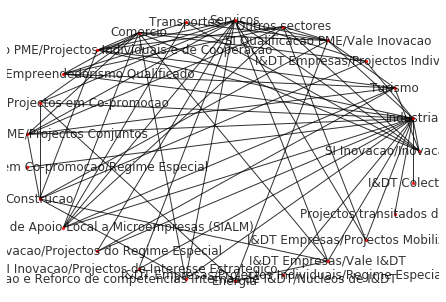

In [216]:
G2 = nx.from_pandas_edgelist(c,source='Instrumento',target='Sector',edge_attr=True, create_using=nx.Graph())
nx.draw(G2, node_color='r', node_size=5, alpha=0.8, with_labels =True, pos=nx.circular_layout(G2))
plt.show()


In [217]:
nx.info(G2)

'Name: \nType: Graph\nNumber of nodes: 25\nNumber of edges: 68\nAverage degree:   5.4400'

In [0]:
nx.draw(G1, node_color='r', node_size=5, alpha=0.8)
plt.show()
nx.info(G1)

In [0]:
G3 = nx.from_pandas_edgelist(result,source='Instrumento',target='NIF',edge_attr=True, create_using=nx.DiGraph())

In [219]:
list(G3.nodes)

['SI Qualificacao PME/Projectos Individuais e de Cooperacao',
 510603556,
 'I&DT Empresas/Projectos em Co-promocao',
 510731651,
 'SI Qualificacao PME/Vale Inovacao',
 510445276,
 'SI Inovacao/Empreendedorismo Qualificado',
 'I&DT Empresas/Projectos Individuais',
 507455509,
 510060625,
 510753884,
 508559588,
 'I&DT Empresas/Projectos Mobilizadores',
 509895948,
 509221785,
 508457467,
 500772738,
 508367360,
 'I&DT Empresas/Vale I&DT',
 509655300,
 507586557,
 509987184,
 510804519,
 510642926,
 510302262,
 508805759,
 510097600,
 509756638,
 510213650,
 510675565,
 507491300,
 509845061,
 510877893,
 510646778,
 508771862,
 'Criacao e Reforco de competencias Internas de I&DT/Nucleos de I&DT',
 500695679,
 510447147,
 510465978,
 'Sistema de Incentivos de Apoio Local a Microempresas (SIALM)',
 507798325,
 509822070,
 509992544,
 509961320,
 509766358,
 508904021,
 'SI Inovacao/Inovacao Produtiva',
 510551890,
 509280285,
 510434126,
 509061907,
 502448911,
 508993970,
 510354050,
 50

## (Intersection, union, sum) 
The intersection A D B of two subspaces A and B in a vector space V consists of all vectors that belong to both A and B; 
ons = [1 0 1;1 0 0;0 0 1] ;
a =  [4 7 9;8 5 4;7 2 5];
W = a.*ons

https://books.google.pt/books?id=N871f_bp810C&pg=PA52&lpg=PA52&dq=union+of+matrix&source=bl&ots=su2bh0u-yZ&sig=ACfU3U2RvbMkKdQJLsVNvi0ALMSCKrPx1Q&hl=en&sa=X&ved=2ahUKEwidrtSX9InkAhWmThUIHfcYCVsQ6AEwFnoECAgQAQ#v=onepage&q=union%20of%20matrix&f=false


join and add by NIF UNION

In [220]:
#from netwtokx import networkx.algorithms.operators.binary.compose
from networkx.algorithms import compose

# combine graphs identifying nodes common to both
ab = compose(G,G3)         

# Build your graph
G_compete=nx.from_pandas_edgelist(qren, 'Instrumento', 'N Contribuinte do Promotor',edge_attr=True, create_using=nx.DiGraph)

#Add edges
#->QREN -> Instrumento
qren['Instrumento'].unique()

array(['SI Inovacao/Inovacao Produtiva',
       'I&DT Empresas/Projectos Individuais',
       'SI Qualificacao PME/Vale Inovacao',
       'SI Qualificacao PME/Projectos Individuais e de Cooperacao',
       'SI Inovacao/Empreendedorismo Qualificado',
       'I&DT Empresas/Projectos em Co-promocao',
       'SI Qualificacao PME/Projectos Conjuntos',
       'I&DT Empresas/Projectos em Co-promocao/Regime Especial',
       'Sistema de Incentivos de Apoio Local a Microempresas (SIALM)',
       'SI Inovacao/Projectos do Regime Especial',
       'SI Inovacao/Projectos de Interesse Estrategico',
       'Criacao e Reforco de competencias Internas de I&DT/Nucleos de I&DT',
       'I&DT Empresas/Projectos Individuais/Regime Especial',
       'I&DT Empresas/Vale I&DT', 'I&DT Empresas/Projectos Mobilizadores',
       'Projectos transitados do QCA III', 'I&DT Colectiva'], dtype=object)

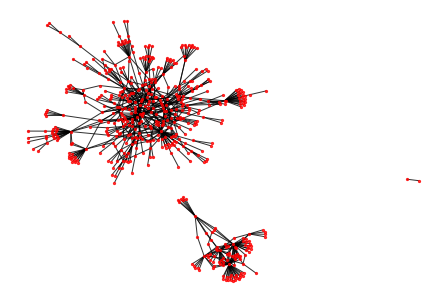

In [221]:
from networkx.algorithms import union

ab
nx.draw(ab, node_color='r', node_size=5, alpha=0.8)

In [224]:
from networkx.algorithms import isomorphism
G3 = nx.path_graph(4)
G = nx.path_graph(4)
GM = isomorphism.GraphMatcher(G3,G)
GM.is_isomorphic()

True

In [225]:
GM.mapping

{0: 0, 1: 1, 2: 2, 3: 3}

In [226]:
from networkx.algorithms import isomorphism

G3 = nx.path_graph(4,create_using=nx.DiGraph())
G = nx.path_graph(4,create_using=nx.DiGraph())
GM = isomorphism.GraphMatcher(G3,G)
GM.is_isomorphic()

True

In [0]:
def getXY(pt):
    return (pt.x, pt.y)
centroidseries = zones['geometry'].centroid
centroidlist = map(getXY, centroidseries)
or if you want two separate lists of x and y coordinates

def getXY(pt):
    return (pt.x, pt.y)
centroidseries = zones['geometry'].centroid
x,y = [list(t) for t in zip(*map(getXY, centroidseries))]


In [0]:
#Transformation to points (centroids)

# copy poly to new GeoDataFrame
points = startupsmap.copy()
# change the geometry
points.geometry = startupsmap['geometry'].centroid
# same crs
startupsmap.crs =startupsmap.crs
points.head()

# save the shapefile
#points.to_file('geoch_centroid.shp')